In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data preprocessing and target creation
df = pd.read_csv('dataset.csv')

BASE_PRICE = 10.0
df['occupancy_ratio'] = df['Occupancy'] / df['Capacity']

alpha = 8.0
queue_weight = 0.5
df['target_price'] = BASE_PRICE + alpha * df['occupancy_ratio'] + queue_weight * df['QueueLength']

df['predicted_price'] = BASE_PRICE + alpha * df['occupancy_ratio'] + queue_weight * df['QueueLength']
mae = np.mean(np.abs(df['predicted_price'] - df['target_price']))
print(f"Linear Formula Applied | MAE: {mae:.4f} | Avg Price: ${df['predicted_price'].mean():.2f}")

Linear Formula Applied | MAE: 0.0000 | Avg Price: $16.37


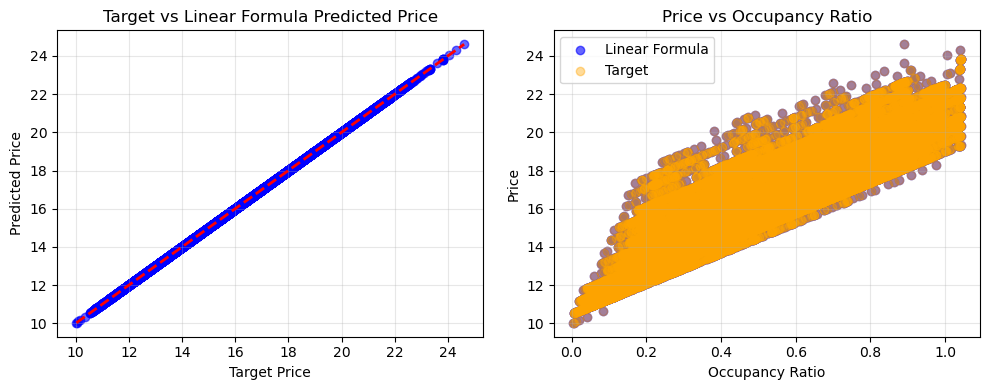

In [3]:
plt.figure(figsize=(10, 4))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(df['target_price'], df['predicted_price'], alpha=0.6, color='blue')
plt.plot([df['target_price'].min(), df['target_price'].max()], 
         [df['target_price'].min(), df['target_price'].max()], 'r--', lw=2)
plt.xlabel('Target Price')
plt.ylabel('Predicted Price')
plt.title('Target vs Linear Formula Predicted Price')
plt.grid(True, alpha=0.3)

# Price vs Occupancy
plt.subplot(1, 2, 2)
plt.scatter(df['occupancy_ratio'], df['predicted_price'], alpha=0.6, label='Linear Formula', color='blue')
plt.scatter(df['occupancy_ratio'], df['target_price'], alpha=0.4, label='Target', color='orange')
plt.xlabel('Occupancy Ratio')
plt.ylabel('Price')
plt.title('Price vs Occupancy Ratio')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()